## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0144592	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9931339	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9713495	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9543817	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9363705	total: 62.7ms	remaining: 12.5s
5:	learn: 0.9222360	total: 63.6ms	remaining: 10.5s
6:	learn: 0.9071086	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8907928	total: 65.8ms	remaining: 8.16s
8:	learn: 0.8750614	total: 66.8ms	remaining: 7.35s
9:	learn: 0.8576777	total: 67.7ms	remaining: 6.71s
10:	learn: 0.8435835	total: 68.6ms	remaining: 6.17s
11:	learn: 0.8271296	total: 69.5ms	remaining: 5.72s
12:	learn: 0.8113884	total: 70.4ms	remaining: 5.35s
13:	learn: 0.7961023	total: 71.3ms	remaining: 5.02s
14:	learn: 0.7831814	total: 72.1ms	remaining: 4.74s
15:	learn: 0.7697789	total: 73ms	remaining: 4.49s
16:	learn: 0.7565937	total: 73.9ms	remaining: 4.27s
17:	learn: 0.7430979	total: 74.7ms	remaining: 4.08s
18:	learn: 0.7304272	total: 75.6ms	remaining: 

61:	learn: 0.4189286	total: 110ms	remaining: 1.66s
62:	learn: 0.4157513	total: 111ms	remaining: 1.65s
63:	learn: 0.4114908	total: 112ms	remaining: 1.63s
64:	learn: 0.4083530	total: 112ms	remaining: 1.62s
65:	learn: 0.4042329	total: 113ms	remaining: 1.6s
66:	learn: 0.4002547	total: 114ms	remaining: 1.59s
67:	learn: 0.3959954	total: 115ms	remaining: 1.57s
68:	learn: 0.3930373	total: 116ms	remaining: 1.56s
69:	learn: 0.3899906	total: 116ms	remaining: 1.55s
70:	learn: 0.3857256	total: 117ms	remaining: 1.53s
71:	learn: 0.3818288	total: 118ms	remaining: 1.52s
72:	learn: 0.3789844	total: 119ms	remaining: 1.51s
73:	learn: 0.3754395	total: 120ms	remaining: 1.5s
74:	learn: 0.3727131	total: 120ms	remaining: 1.49s
75:	learn: 0.3699331	total: 121ms	remaining: 1.48s
76:	learn: 0.3663936	total: 122ms	remaining: 1.47s
77:	learn: 0.3635990	total: 123ms	remaining: 1.45s
78:	learn: 0.3616192	total: 124ms	remaining: 1.44s
79:	learn: 0.3594730	total: 125ms	remaining: 1.43s
80:	learn: 0.3571465	total: 125ms

158:	learn: 0.2478899	total: 192ms	remaining: 1.01s
159:	learn: 0.2471542	total: 193ms	remaining: 1.01s
160:	learn: 0.2463993	total: 194ms	remaining: 1.01s
161:	learn: 0.2457303	total: 195ms	remaining: 1.01s
162:	learn: 0.2450055	total: 195ms	remaining: 1s
163:	learn: 0.2440658	total: 196ms	remaining: 1s
164:	learn: 0.2433586	total: 197ms	remaining: 998ms
165:	learn: 0.2426145	total: 198ms	remaining: 995ms
166:	learn: 0.2419005	total: 199ms	remaining: 991ms
167:	learn: 0.2412488	total: 200ms	remaining: 989ms
168:	learn: 0.2406487	total: 200ms	remaining: 986ms
169:	learn: 0.2399508	total: 201ms	remaining: 983ms
170:	learn: 0.2391782	total: 202ms	remaining: 979ms
171:	learn: 0.2382711	total: 204ms	remaining: 980ms
172:	learn: 0.2373771	total: 204ms	remaining: 978ms
173:	learn: 0.2366876	total: 205ms	remaining: 975ms
174:	learn: 0.2360506	total: 206ms	remaining: 972ms
175:	learn: 0.2352805	total: 207ms	remaining: 969ms
176:	learn: 0.2346331	total: 208ms	remaining: 966ms
177:	learn: 0.2342

283:	learn: 0.1789167	total: 301ms	remaining: 759ms
284:	learn: 0.1783773	total: 302ms	remaining: 757ms
285:	learn: 0.1778196	total: 303ms	remaining: 755ms
286:	learn: 0.1774981	total: 303ms	remaining: 754ms
287:	learn: 0.1770201	total: 304ms	remaining: 752ms
288:	learn: 0.1767447	total: 305ms	remaining: 751ms
289:	learn: 0.1764096	total: 306ms	remaining: 749ms
290:	learn: 0.1761410	total: 307ms	remaining: 748ms
291:	learn: 0.1757070	total: 308ms	remaining: 746ms
292:	learn: 0.1751640	total: 308ms	remaining: 744ms
293:	learn: 0.1749167	total: 309ms	remaining: 743ms
294:	learn: 0.1747077	total: 310ms	remaining: 741ms
295:	learn: 0.1742921	total: 311ms	remaining: 739ms
296:	learn: 0.1736441	total: 312ms	remaining: 738ms
297:	learn: 0.1732631	total: 312ms	remaining: 736ms
298:	learn: 0.1729253	total: 313ms	remaining: 735ms
299:	learn: 0.1725376	total: 314ms	remaining: 733ms
300:	learn: 0.1720005	total: 315ms	remaining: 732ms
301:	learn: 0.1715778	total: 316ms	remaining: 730ms
302:	learn: 

381:	learn: 0.1454095	total: 382ms	remaining: 619ms
382:	learn: 0.1451628	total: 383ms	remaining: 617ms
383:	learn: 0.1449720	total: 384ms	remaining: 616ms
384:	learn: 0.1445734	total: 385ms	remaining: 615ms
385:	learn: 0.1443071	total: 386ms	remaining: 613ms
386:	learn: 0.1441972	total: 387ms	remaining: 612ms
387:	learn: 0.1439114	total: 387ms	remaining: 611ms
388:	learn: 0.1435708	total: 388ms	remaining: 610ms
389:	learn: 0.1433826	total: 389ms	remaining: 608ms
390:	learn: 0.1431312	total: 390ms	remaining: 607ms
391:	learn: 0.1428166	total: 391ms	remaining: 606ms
392:	learn: 0.1424669	total: 391ms	remaining: 605ms
393:	learn: 0.1421871	total: 392ms	remaining: 603ms
394:	learn: 0.1418721	total: 393ms	remaining: 602ms
395:	learn: 0.1416902	total: 394ms	remaining: 601ms
396:	learn: 0.1415849	total: 395ms	remaining: 599ms
397:	learn: 0.1413498	total: 395ms	remaining: 598ms
398:	learn: 0.1409184	total: 396ms	remaining: 597ms
399:	learn: 0.1406503	total: 397ms	remaining: 596ms
400:	learn: 

511:	learn: 0.1166130	total: 491ms	remaining: 468ms
512:	learn: 0.1164554	total: 492ms	remaining: 467ms
513:	learn: 0.1161934	total: 493ms	remaining: 466ms
514:	learn: 0.1160885	total: 494ms	remaining: 465ms
515:	learn: 0.1159792	total: 494ms	remaining: 464ms
516:	learn: 0.1159157	total: 495ms	remaining: 463ms
517:	learn: 0.1158813	total: 496ms	remaining: 462ms
518:	learn: 0.1158340	total: 497ms	remaining: 460ms
519:	learn: 0.1157263	total: 498ms	remaining: 459ms
520:	learn: 0.1154894	total: 498ms	remaining: 458ms
521:	learn: 0.1154362	total: 499ms	remaining: 457ms
522:	learn: 0.1151406	total: 500ms	remaining: 456ms
523:	learn: 0.1150935	total: 501ms	remaining: 455ms
524:	learn: 0.1148983	total: 502ms	remaining: 454ms
525:	learn: 0.1147361	total: 502ms	remaining: 453ms
526:	learn: 0.1146647	total: 503ms	remaining: 452ms
527:	learn: 0.1143727	total: 504ms	remaining: 451ms
528:	learn: 0.1143269	total: 505ms	remaining: 450ms
529:	learn: 0.1139502	total: 506ms	remaining: 448ms
530:	learn: 

611:	learn: 0.1008862	total: 573ms	remaining: 363ms
612:	learn: 0.1006956	total: 574ms	remaining: 362ms
613:	learn: 0.1005113	total: 574ms	remaining: 361ms
614:	learn: 0.1003344	total: 575ms	remaining: 360ms
615:	learn: 0.1001321	total: 576ms	remaining: 359ms
616:	learn: 0.0999204	total: 577ms	remaining: 358ms
617:	learn: 0.0998579	total: 578ms	remaining: 357ms
618:	learn: 0.0997783	total: 578ms	remaining: 356ms
619:	learn: 0.0995705	total: 579ms	remaining: 355ms
620:	learn: 0.0994607	total: 580ms	remaining: 354ms
621:	learn: 0.0993979	total: 581ms	remaining: 353ms
622:	learn: 0.0992223	total: 581ms	remaining: 352ms
623:	learn: 0.0991226	total: 582ms	remaining: 351ms
624:	learn: 0.0989553	total: 583ms	remaining: 350ms
625:	learn: 0.0989347	total: 584ms	remaining: 349ms
626:	learn: 0.0987742	total: 585ms	remaining: 348ms
627:	learn: 0.0985280	total: 585ms	remaining: 347ms
628:	learn: 0.0984170	total: 586ms	remaining: 346ms
629:	learn: 0.0982708	total: 587ms	remaining: 345ms
630:	learn: 

746:	learn: 0.0830923	total: 682ms	remaining: 231ms
747:	learn: 0.0829314	total: 683ms	remaining: 230ms
748:	learn: 0.0828199	total: 684ms	remaining: 229ms
749:	learn: 0.0827007	total: 685ms	remaining: 228ms
750:	learn: 0.0825700	total: 685ms	remaining: 227ms
751:	learn: 0.0824563	total: 686ms	remaining: 226ms
752:	learn: 0.0823535	total: 687ms	remaining: 225ms
753:	learn: 0.0822045	total: 688ms	remaining: 224ms
754:	learn: 0.0820396	total: 688ms	remaining: 223ms
755:	learn: 0.0819110	total: 689ms	remaining: 223ms
756:	learn: 0.0817522	total: 690ms	remaining: 222ms
757:	learn: 0.0816146	total: 691ms	remaining: 221ms
758:	learn: 0.0814949	total: 692ms	remaining: 220ms
759:	learn: 0.0812899	total: 693ms	remaining: 219ms
760:	learn: 0.0811773	total: 693ms	remaining: 218ms
761:	learn: 0.0809980	total: 694ms	remaining: 217ms
762:	learn: 0.0808626	total: 695ms	remaining: 216ms
763:	learn: 0.0807628	total: 696ms	remaining: 215ms
764:	learn: 0.0805637	total: 696ms	remaining: 214ms
765:	learn: 

841:	learn: 0.0716345	total: 763ms	remaining: 143ms
842:	learn: 0.0716189	total: 764ms	remaining: 142ms
843:	learn: 0.0715256	total: 765ms	remaining: 141ms
844:	learn: 0.0713815	total: 766ms	remaining: 140ms
845:	learn: 0.0713456	total: 766ms	remaining: 140ms
846:	learn: 0.0712822	total: 767ms	remaining: 139ms
847:	learn: 0.0712708	total: 769ms	remaining: 138ms
848:	learn: 0.0711895	total: 770ms	remaining: 137ms
849:	learn: 0.0711023	total: 770ms	remaining: 136ms
850:	learn: 0.0710889	total: 771ms	remaining: 135ms
851:	learn: 0.0709931	total: 772ms	remaining: 134ms
852:	learn: 0.0709796	total: 773ms	remaining: 133ms
853:	learn: 0.0709518	total: 774ms	remaining: 132ms
854:	learn: 0.0708542	total: 775ms	remaining: 131ms
855:	learn: 0.0706952	total: 776ms	remaining: 130ms
856:	learn: 0.0705457	total: 776ms	remaining: 130ms
857:	learn: 0.0704732	total: 777ms	remaining: 129ms
858:	learn: 0.0702785	total: 778ms	remaining: 128ms
859:	learn: 0.0701284	total: 779ms	remaining: 127ms
860:	learn: 

972:	learn: 0.0602994	total: 872ms	remaining: 24.2ms
973:	learn: 0.0602055	total: 873ms	remaining: 23.3ms
974:	learn: 0.0600931	total: 874ms	remaining: 22.4ms
975:	learn: 0.0600141	total: 874ms	remaining: 21.5ms
976:	learn: 0.0599501	total: 875ms	remaining: 20.6ms
977:	learn: 0.0598939	total: 876ms	remaining: 19.7ms
978:	learn: 0.0597654	total: 877ms	remaining: 18.8ms
979:	learn: 0.0596590	total: 878ms	remaining: 17.9ms
980:	learn: 0.0595609	total: 878ms	remaining: 17ms
981:	learn: 0.0594462	total: 879ms	remaining: 16.1ms
982:	learn: 0.0593264	total: 880ms	remaining: 15.2ms
983:	learn: 0.0592965	total: 881ms	remaining: 14.3ms
984:	learn: 0.0591611	total: 881ms	remaining: 13.4ms
985:	learn: 0.0591444	total: 882ms	remaining: 12.5ms
986:	learn: 0.0590460	total: 883ms	remaining: 11.6ms
987:	learn: 0.0589947	total: 884ms	remaining: 10.7ms
988:	learn: 0.0588946	total: 885ms	remaining: 9.84ms
989:	learn: 0.0587976	total: 886ms	remaining: 8.95ms
990:	learn: 0.0587102	total: 886ms	remaining: 8.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

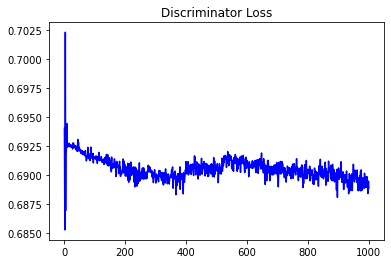

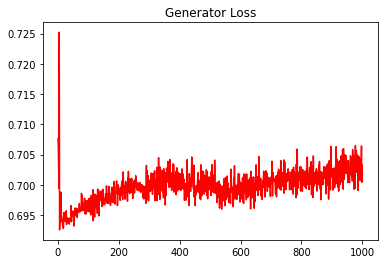

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15058823279748879


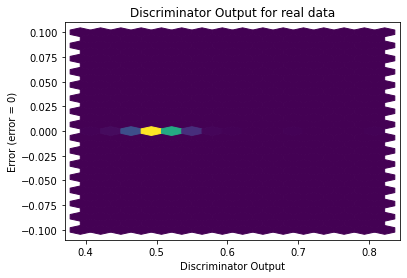

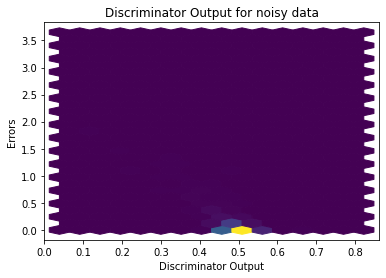

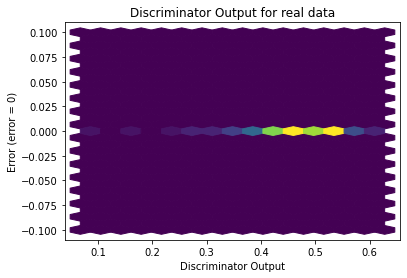

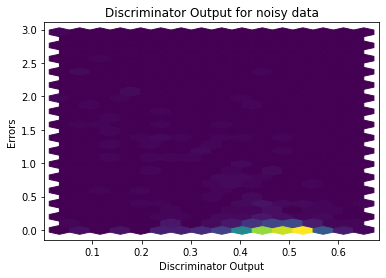

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


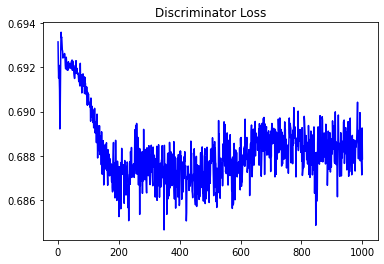

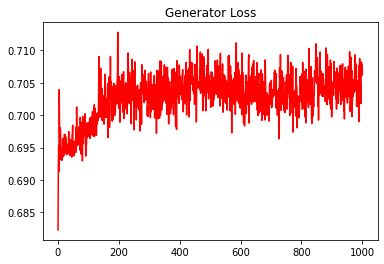

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17168525467169812


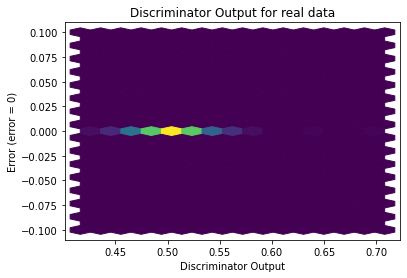

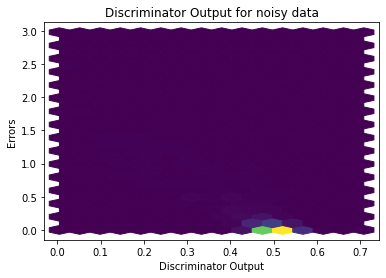

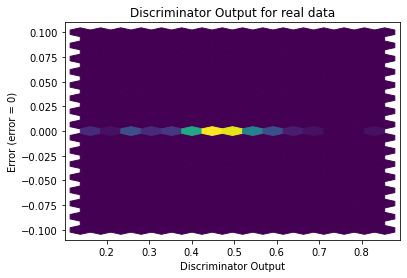

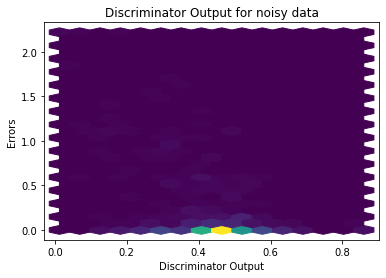

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9070]], requires_grad=True)
